# Restaurant Orders Analysis

## Importing The Orders File

In [365]:
import pandas as pd

df = pd.read_csv(r"C:\Users\kavin\Downloads\Restaurant+Orders+CSV\order_details.csv")
df

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,1/1/23,11:38:36 AM,109.0
1,2,2,1/1/23,11:57:40 AM,108.0
2,3,2,1/1/23,11:57:40 AM,124.0
3,4,2,1/1/23,11:57:40 AM,117.0
4,5,2,1/1/23,11:57:40 AM,129.0
...,...,...,...,...,...
12229,12230,5369,3/31/23,10:05:04 PM,109.0
12230,12231,5369,3/31/23,10:05:04 PM,129.0
12231,12232,5369,3/31/23,10:05:04 PM,120.0
12232,12233,5369,3/31/23,10:05:04 PM,122.0


In [366]:
df.dtypes

order_details_id      int64
order_id              int64
order_date           object
order_time           object
item_id             float64
dtype: object

In [367]:
df["order_date"] = pd.to_datetime(df["order_date"])

C:\Users\kavin\AppData\Local\Temp\ipykernel_12620\4261617660.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["order_date"] = pd.to_datetime(df["order_date"])


In [413]:
df.head()

,order_details_id,order_id,order_date,order_time,item_id,order_date_str,order_time_str
0,1,1,2023-01-01,11:38:36 AM,109.0,2023-01-01,11:38:36 AM
1,2,2,2023-01-01,11:57:40 AM,108.0,2023-01-01,11:57:40 AM
2,3,2,2023-01-01,11:57:40 AM,124.0,2023-01-01,11:57:40 AM
3,4,2,2023-01-01,11:57:40 AM,117.0,2023-01-01,11:57:40 AM
4,5,2,2023-01-01,11:57:40 AM,129.0,2023-01-01,11:57:40 AM


In [412]:
df.tail()

,order_details_id,order_id,order_date,order_time,item_id,order_date_str,order_time_str
12229,12230,5369,2023-03-31,10:05:04 PM,109.0,2023-03-31,10:05:04 PM
12230,12231,5369,2023-03-31,10:05:04 PM,129.0,2023-03-31,10:05:04 PM
12231,12232,5369,2023-03-31,10:05:04 PM,120.0,2023-03-31,10:05:04 PM
12232,12233,5369,2023-03-31,10:05:04 PM,122.0,2023-03-31,10:05:04 PM
12233,12234,5370,2023-03-31,10:15:48 PM,122.0,2023-03-31,10:15:48 PM


In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 12233
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12097 non-null  int64         
 1   order_id          12097 non-null  int64         
 2   order_date        12097 non-null  datetime64[ns]
 3   order_time        12097 non-null  object        
 4   item_id           12097 non-null  float64       
 5   order_date_str    12097 non-null  object        
 6   order_time_str    12097 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 756.1+ KB


## Cleaning Up Missing Rows

In [373]:
df.isnull().sum()

order_details_id      0
order_id              0
order_date            0
order_time            0
item_id             137
dtype: int64

In [374]:
df.dropna(inplace=True)

In [375]:
df.isnull().sum()

order_details_id    0
order_id            0
order_date          0
order_time          0
item_id             0
dtype: int64

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12097 non-null  int64         
 1   order_id          12097 non-null  int64         
 2   order_date        12097 non-null  datetime64[ns]
 3   order_time        12097 non-null  object        
 4   item_id           12097 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 567.0+ KB


# Joining Menu Items

In [415]:
df_menu = pd.read_csv(r"C:\Users\kavin\Downloads\Restaurant+Orders+CSV\menu_items.csv")
df_menu.head()

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


In [378]:
df_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [379]:
joined_df = pd.merge(df, df_menu, left_on="item_id", right_on="menu_item_id", how="left").drop("menu_item_id", axis=1)

In [380]:
joined_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
0,1,1,2023-01-01,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95
1,2,2,2023-01-01,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50
2,3,2,2023-01-01,11:57:40 AM,124.0,Spaghetti,Italian,14.50
3,4,2,2023-01-01,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95
4,5,2,2023-01-01,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50


In [381]:
joined_df.tail()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
12092,12230,5369,2023-03-31,10:05:04 PM,109.0,Korean Beef Bowl,Asian,17.95
12093,12231,5369,2023-03-31,10:05:04 PM,129.0,Mushroom Ravioli,Italian,15.50
12094,12232,5369,2023-03-31,10:05:04 PM,120.0,Steak Torta,Mexican,13.95
12095,12233,5369,2023-03-31,10:05:04 PM,122.0,Chips & Salsa,Mexican,7.00
12096,12234,5370,2023-03-31,10:15:48 PM,122.0,Chips & Salsa,Mexican,7.00


## Adding Tax & Total Revenue Columns

In [382]:
joined_df["sales_tax"] = (joined_df["price"] * 0.08).round(2)
joined_df["total_revenue"] = (joined_df["price"] + joined_df["sales_tax"])
joined_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,sales_tax,total_revenue
0,1,1,2023-01-01,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39
1,2,2,2023-01-01,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66
2,3,2,2023-01-01,11:57:40 AM,124.0,Spaghetti,Italian,14.50,1.16,15.66
3,4,2,2023-01-01,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95,1.04,13.99
4,5,2,2023-01-01,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74


In [383]:
joined_df.describe()

,order_details_id,order_id,order_date,item_id,price,sales_tax,total_revenue
count,12097.000000,12097.000000,12097,12097.000000,12097.000000,12097.000000,12097.000000
mean,6118.950897,2692.569149,2023-02-14 11:17:33.781929216,115.202282,13.161767,1.055128,14.216895
min,1.000000,1.000000,2023-01-01 00:00:00,101.000000,5.000000,0.400000,5.400000
25%,3064.000000,1353.000000,2023-01-23 00:00:00,107.000000,10.500000,0.840000,11.340000
50%,6119.000000,2711.000000,2023-02-14 00:00:00,114.000000,13.950000,1.120000,15.070000
75%,9175.000000,4020.000000,2023-03-09 00:00:00,123.000000,16.500000,1.320000,17.820000
max,12234.000000,5370.000000,2023-03-31 00:00:00,132.000000,19.950000,1.600000,21.550000
std,3531.337208,1545.826452,NaN,9.387580,3.986392,0.320078,4.306466


In [384]:
joined_df

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,sales_tax,total_revenue
0,1,1,2023-01-01,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39
1,2,2,2023-01-01,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66
2,3,2,2023-01-01,11:57:40 AM,124.0,Spaghetti,Italian,14.50,1.16,15.66
3,4,2,2023-01-01,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95,1.04,13.99
4,5,2,2023-01-01,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74
...,...,...,...,...,...,...,...,...,...,...
12092,12230,5369,2023-03-31,10:05:04 PM,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39
12093,12231,5369,2023-03-31,10:05:04 PM,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74
12094,12232,5369,2023-03-31,10:05:04 PM,120.0,Steak Torta,Mexican,13.95,1.12,15.07
12095,12233,5369,2023-03-31,10:05:04 PM,122.0,Chips & Salsa,Mexican,7.00,0.56,7.56


# Analyzing The Best Selling And Worst Selling Items

In [385]:
joined_df.columns

Index(['order_details_id', 'order_id', 'order_date', 'order_time', 'item_id',
       'item_name', 'category', 'price', 'sales_tax', 'total_revenue'],
      dtype='object')

<Axes: ylabel='item_name'>

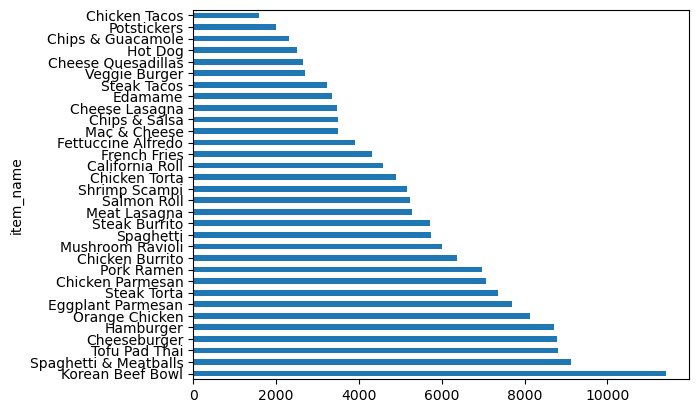

In [386]:
(joined_df.groupby("item_name")["total_revenue"]
 .sum()
 .sort_values(ascending=False).plot.barh()) # No col name -  series only has 1 value col.

In [387]:
(joined_df.groupby("item_name")
.agg({"total_revenue":"sum"})
.sort_values("total_revenue"))

,total_revenue
item_name,
Chicken Tacos,1587.93
Potstickers,1992.60
Chips & Guacamole,2303.64
Hot Dog,2498.04
Cheese Quesadillas,2642.22
Veggie Burger,2698.92
Steak Tacos,3224.98
Edamame,3348.00
Cheese Lasagna,3465.18


<Axes: ylabel='item_name'>

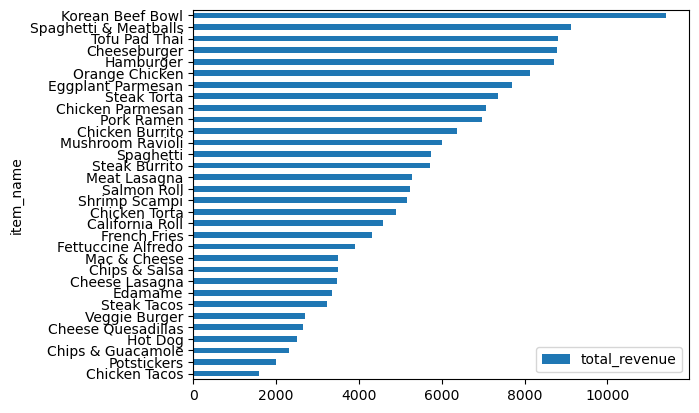

In [388]:
(joined_df
.groupby("item_name")
.agg({"total_revenue":"sum"})
.sort_values("total_revenue")).plot.barh()

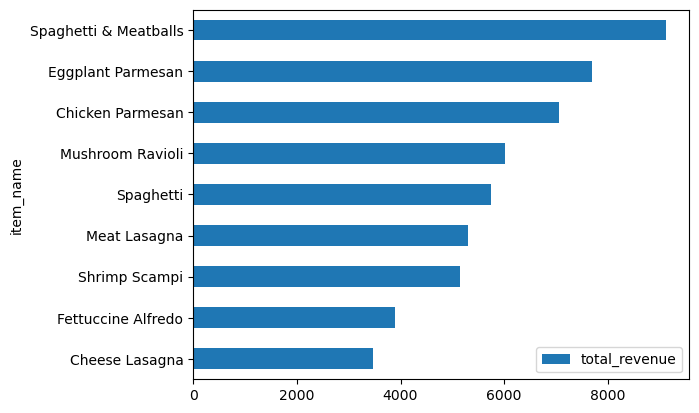

In [389]:
import matplotlib.pyplot as plt

(joined_df
 .query("category == 'Italian'")
.groupby("item_name")
.agg({"total_revenue":"sum"})
.sort_values("total_revenue")).plot.barh()

plt.show()

# Analyzing Busiest Times

In [390]:
joined_df.head(1)

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,sales_tax,total_revenue
0,1,1,2023-01-01,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39


In [416]:
joined_df["order_datetime"] = pd.to_datetime(
    joined_df["order_date"].astype(str) + ' ' + joined_df["order_time"].astype(str)
)

In [417]:
joined_df.dtypes

order_details_id             int64
order_id                     int64
order_date          datetime64[ns]
order_time                  object
item_id                    float64
item_name                   object
category                    object
price                      float64
sales_tax                  float64
total_revenue              float64
order_datetime      datetime64[ns]
hour                         int32
minute                       int32
day of week                  int32
dtype: object

In [418]:
print(joined_df.columns)


Index(['order_details_id', 'order_id', 'order_date', 'order_time', 'item_id',
       'item_name', 'category', 'price', 'sales_tax', 'total_revenue',
       'order_datetime', 'hour', 'minute', 'day of week'],
      dtype='object')


In [419]:
joined_df['hour'] = joined_df['order_datetime'].dt.hour
joined_df['minute'] = joined_df['order_datetime'].dt.minute


In [395]:
joined_df.dtypes

order_details_id             int64
order_id                     int64
order_date          datetime64[ns]
order_time                  object
item_id                    float64
item_name                   object
category                    object
price                      float64
sales_tax                  float64
total_revenue              float64
order_datetime      datetime64[ns]
hour                         int32
minute                       int32
dtype: object

In [396]:
hourly_revenue = joined_df.groupby('hour')['total_revenue'].sum()
print(hourly_revenue)

hour
10       68.43
11     8773.58
12    23459.52
13    22294.93
14    13627.10
15    10589.90
16    14810.85
17    19302.02
18    18213.14
19    15308.76
20    12614.88
21     8375.95
22     4372.28
23      170.44
Name: total_revenue, dtype: float64


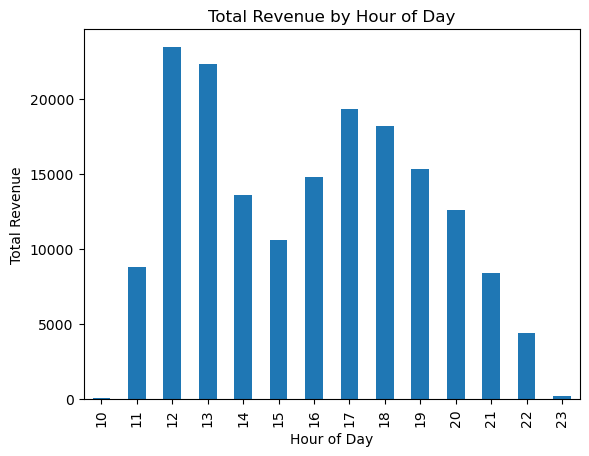

In [397]:
hourly_revenue.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Hour of Day')
plt.show()


In [424]:
hour_by_minute_revenue = joined_df.groupby(['hour', 'minute'])['total_revenue'].sum().unstack(fill_value=0)
hour_by_minute_revenue

minute,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
hour,,,,,,,,,,,,,,,,,,,,,
10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,36.13,0.00,0.00,0.00,32.30,0.00,0.00,0.00,0.00,0.00
11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,292.28,115.31,489.91,104.66,199.30,192.43,259.78,416.62,74.96,77.66
12,336.36,370.43,154.68,302.39,200.58,175.05,477.00,712.82,412.15,197.83,...,312.16,243.09,598.10,581.56,385.01,196.70,805.80,555.10,418.29,373.96
13,320.70,300.67,605.22,425.26,847.13,337.98,372.44,565.51,406.75,491.53,...,144.91,304.55,236.02,387.41,150.36,262.97,292.18,279.07,331.11,573.80
14,678.90,169.85,212.36,621.37,362.33,151.00,502.72,363.21,316.33,471.75,...,318.44,132.59,66.86,204.75,137.89,150.36,72.26,217.66,93.32,104.56
15,399.63,198.96,77.56,54.44,60.43,230.62,37.70,226.35,263.51,111.04,...,247.95,32.89,49.09,226.25,183.20,149.82,153.06,125.52,299.15,293.85
16,90.62,296.40,85.71,204.31,204.80,140.59,189.09,484.61,266.21,331.01,...,373.67,361.74,178.98,128.86,134.75,277.94,364.78,355.80,364.83,322.17
17,258.31,238.18,234.99,153.06,308.33,353.44,208.58,213.98,380.54,377.35,...,347.99,382.85,327.72,265.23,456.43,308.33,304.01,272.64,338.47,279.51
18,257.13,256.05,370.97,165.38,405.33,313.09,393.94,220.46,201.61,250.01,...,547.10,190.71,163.37,606.60,270.04,212.85,148.30,322.27,309.36,310.49


C:\Users\kavin\AppData\Local\Temp\ipykernel_12620\1736881631.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


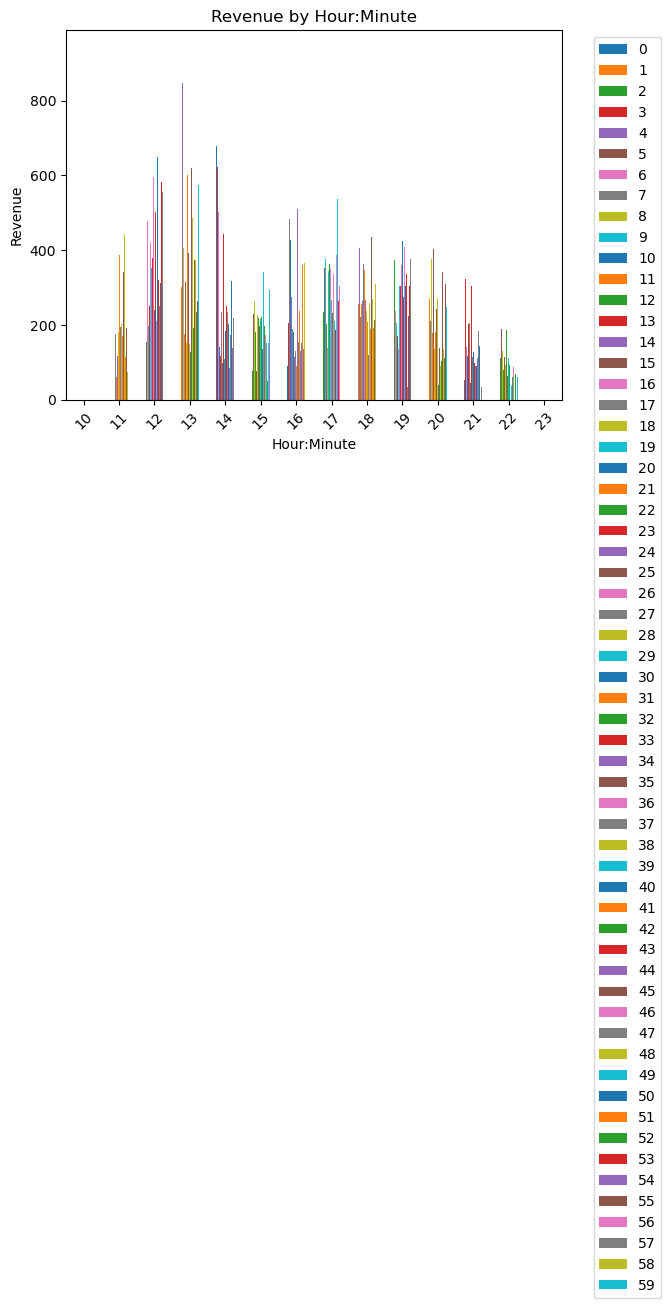

In [432]:
hour_by_minute_revenue.plot(kind="bar", title="Revenue by Hour:Minute")
plt.xlabel("Hour:Minute")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [399]:
minute_revenue = joined_df.groupby('minute')['total_revenue'].sum()
print(hourly_revenue)

hour
10       68.43
11     8773.58
12    23459.52
13    22294.93
14    13627.10
15    10589.90
16    14810.85
17    19302.02
18    18213.14
19    15308.76
20    12614.88
21     8375.95
22     4372.28
23      170.44
Name: total_revenue, dtype: float64


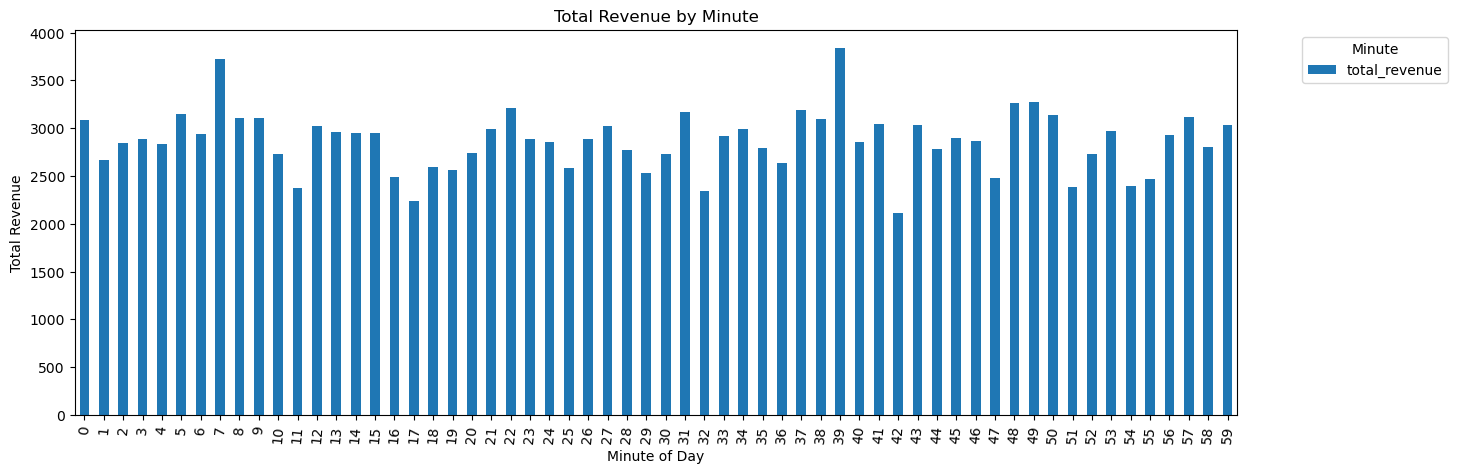

In [400]:
plt.figure(figsize=(15,5))
minute_revenue.plot(kind='bar')
plt.xticks(rotation=85)
plt.xlabel('Minute of Day')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Minute')

plt.legend(title='Minute', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [401]:
joined_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,sales_tax,total_revenue,order_datetime,hour,minute
0,1,1,2023-01-01,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39,2023-01-01 11:38:36,11,38
1,2,2,2023-01-01,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66,2023-01-01 11:57:40,11,57
2,3,2,2023-01-01,11:57:40 AM,124.0,Spaghetti,Italian,14.50,1.16,15.66,2023-01-01 11:57:40,11,57
3,4,2,2023-01-01,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95,1.04,13.99,2023-01-01 11:57:40,11,57
4,5,2,2023-01-01,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74,2023-01-01 11:57:40,11,57


In [402]:
joined_df["day of week"] = joined_df["order_datetime"].dt.dayofweek
joined_df.tail()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,sales_tax,total_revenue,order_datetime,hour,minute,day of week
12092,12230,5369,2023-03-31,10:05:04 PM,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39,2023-03-31 22:05:04,22,5,4
12093,12231,5369,2023-03-31,10:05:04 PM,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74,2023-03-31 22:05:04,22,5,4
12094,12232,5369,2023-03-31,10:05:04 PM,120.0,Steak Torta,Mexican,13.95,1.12,15.07,2023-03-31 22:05:04,22,5,4
12095,12233,5369,2023-03-31,10:05:04 PM,122.0,Chips & Salsa,Mexican,7.00,0.56,7.56,2023-03-31 22:05:04,22,5,4
12096,12234,5370,2023-03-31,10:15:48 PM,122.0,Chips & Salsa,Mexican,7.00,0.56,7.56,2023-03-31 22:15:48,22,15,4


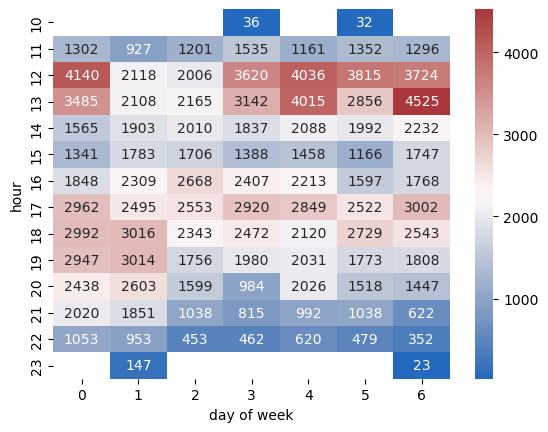

In [440]:
# Visualizing the days with the busiest hours

import seaborn as sns

sns.heatmap(
    (joined_df.pivot_table(
        index="hour",
        columns="day of week",
        values="total_revenue",
        aggfunc="sum"
    )).round(), annot=True, fmt="g", cmap='vlag'
)
plt.show()

# 1. What items drive the most and least revenue?

## Most revenue items, 
1. Korean Beef Bowl
2. Spaghetti & Meatballs
3. Tofu Pad Thai

## Least Revenue Items,
1. Chicken Tacos
2. Potstickers
3. Chips & Guacamole

# 2. Which time periods have the highest and lowest revenue?

## Highest revenue time periods,
1. Day 4 (Friday) – Hours 12 to 14 → This is the top revenue-generating time slot of the entire week.
2. Day 6 (Sunday) – Hours 12 to 14 → This is the second highest revenue-generating time slot, with Hour 13 to 14 being the single peak hour across all days.

## Lowest revenue time periods,
1. Day 6 (Sunday) – Hours 21 to 23 → This time slot has the lowest revenue when compared to the same time period on all other days of the week.
2. Day 3 (Wednesday) – Hours 21 to 23 → This time slot has the second lowest revenue during that same evening window across the week.